In [2]:
from data import Course
from ouc_course_tool import *
from data.schedule import CourseTable
from tests.test_config import ConfigOfTest
from ouc_course_tool.core.search_param_handle import search_param_handle
from ouc_course_tool.util import draw_course_table

导入包 和 设置绘图函数

In [3]:
test_config = ConfigOfTest('./tests/test_resource/account_local.ini')
tesseract_cmd_path = 'D:/Tools/Tesseract/tesseract.exe'

login_config = LoginConfig(test_config.get_username(), test_config.get_password(), tesseract_cmd_path)

设置 Tesseract 图片识别软件
EXAMPLE DOWNLOAD URL: https://digi.bib.uni-mannheim.de/tesseract/tesseract-ocr-w64-setup-5.3.4.20240503.exe

设置 全局变量（包括账号和密码）
设置 登录配置


In [4]:
session_id = AccountValidation(login_config).get_login_session_id()
print(session_id)

4E27D4AFE7ECBEA51A9B0C441BF9BECF


获取登录 ID

In [5]:
fetcher_config = CourseFetcherConfig(session_id=session_id)
course_fetcher = CourseFetcher(config=fetcher_config)

设置 搜索配置

In [6]:
target_course = [
    '围棋-选修',
    '概率-公共',
    '形势与政策-公共',
    '毛泽东思想-公共',
    '网球-公共',
    '离散数学-智能科学-2023',
    '计算机系统基础-智能科学-2023',
    '人工智能先导实践-智能科学-2023',
    '人工智能导论-智能科学-2022',
    '机器人学导论-智能科学-2022',
]
mul_params = search_param_handle(target_course, campus=3, year_and_term='2024-1')
courses_list = course_fetcher.get_courses_from_mul_params(mul_params)

目标选课

In [7]:
importance_course = [
    '离散数学',
    '概率统计',
    '人工智能导论',
    '围棋'
]

unnecessary_course = [
    '篮球',
    '足球',
]

no_overflow_course = [
    '概率',
    '形势与政策',
    # '毛泽东思想',
    '网球',
]

no_8_course = [
    '概率',
    '形势与政策',
    '毛泽东思想',
    '计算机系统基础',
]

def is_in_course(target, course_list):
    for temp_course in course_list:
        if temp_course in target:
            return True

def limit_function(course):
    
    # 重要的不限制的课
    if is_in_course(course.course_name, importance_course):
        return False
    
    # 不要的课
    if is_in_course(course.course_name, unnecessary_course):
        return True
    
    # 超人数 不选
    if is_in_course(course.course_name, no_overflow_course):
        if float(course.limit) < int(course.selected_count) * 1:
            return True
    
    # 早八 不选
    if is_in_course(course.course_name, no_8_course):
        for time in course.get_class_time_list():
            if time.start_period == 1:
                return True
        
table = CourseTable.calculate_course(courses_list, limit_function)
# table = CourseTable.calculate_course(courses_list, None)
table.print_courses()

selection_number_list = map(lambda temp_course: int(temp_course.selection_number), table.selected_courses)
selection_number_list = sorted(list(selection_number_list), reverse=True)
selection_number_list = map(lambda temp_course: str(temp_course).rjust(8, '0'), selection_number_list)

围棋与中国文化
07001044 齐祥明

概率统计
16001079 王雯

形势与政策-2024秋
19000180 梁山

毛泽东思想和中国特色社会主义理论体系概论
19000018 隋筱童

体育(初级网球)
18003235 外聘(体育)

离散数学Ⅱ
02003004 马慧

计算机系统基础
02003110 范浩

人工智能先导实践
02003066 徐建良

人工智能导论
02003125 贺佩兰

机器人学导论
02003012 梁馨月



[009101251913]围棋与中国文化 40/59 !!!!!! 19
[008401101063]概率统计 120/43 
[008101202401]形势与政策-2024秋 150/149 
[008101101035]毛泽东思想和中国特色社会主义理论体系概论 160/170 !!!!!! 10
[008201103047]体育(初级网球) 40/39 
[080502201309]离散数学Ⅱ 60/102 !!!!!! 42
[080502201205]计算机系统基础 80/69 
[080503202301]人工智能先导实践 50/49 
[080502101345]人工智能导论 25/67 !!!!!! 42
[080503201305]机器人学导论 50/44 
113


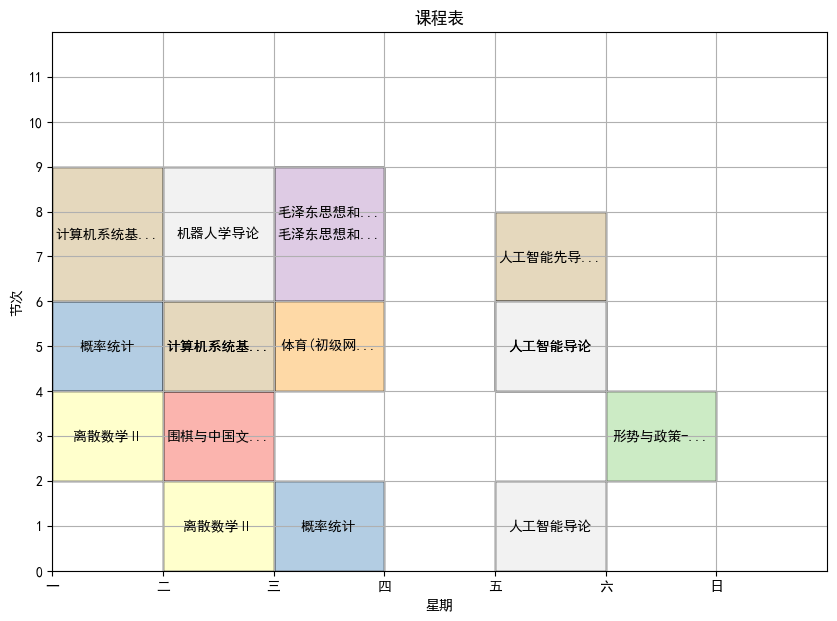

In [8]:
over_flow = 0
for course in table.selected_courses:
    n1, n2 = int(course.limit), int(course.selected_count)
    print(course.course_name, str(n1) + "/" + str(n2), "!!!!!! 超出人数" + str(n2 - n1) if n1 < n2 else "")
    over_flow += n2 - n1 if n1 < n2 else 0
print('总计超出人数', over_flow)

draw_course_table(table.selected_courses)

设置限制函数 并且 获得课程表

In [10]:
common_params = CourseFetcherParams()
common_params.set_keyword('人工智能导论')
common_params.sel_nj = 2022

result: list[Course] = course_fetcher.get_courses_by_params(common_params)

for course in result:
    print(course.get_class_time_list())

[周次: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17] 星期: 五 (1-2节) 双周, 周次: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17] 星期: 五 (5-6节) 双周, 周次: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17] 星期: 五 (5-6节) 单周]
[周次: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17] 星期: 五 (1-2节) 双周, 周次: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17] 星期: 五 (5-6节) 单周, 周次: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17] 星期: 五 (5-6节) 双周]
